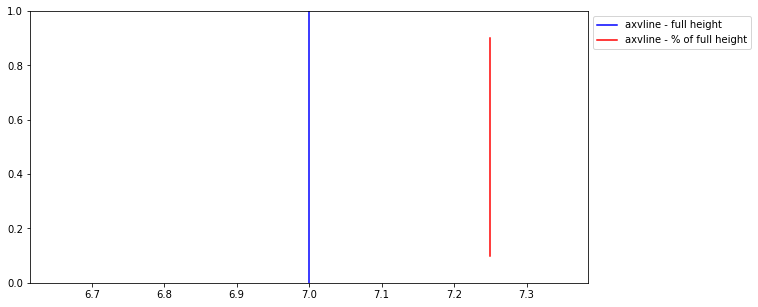

In [10]:
# importing the modules
import matplotlib.pyplot as plt
import numpy as np

# specifying the plot size
plt.figure(figsize = (10, 5))

# only one line may be specified; full height
plt.axvline(x = 7, color = 'b', label = 'axvline - full height')

# only one line may be specified; ymin & ymax specified as
# a percentage of y-range
plt.axvline(x = 7.25, ymin = 0.1, ymax = 0.90, color = 'r',
			label = 'axvline - % of full height')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

# rendering plot
plt.show()
# https://www.geeksforgeeks.org/plot-a-vertical-line-in-matplotlib/

In [4]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)

In [ ]:
# plotly title and color
fig.update_layout(title_text='Top 20 Most Popular Movie: All time(mean line-red)', title_x=0.5,font={'family':'Arial','size':18, 'color':'red'})


In [ ]:
# add a line in plotly
fig.add_hline(y=df['popularity'].mean(),line_width=3, line_color="red")

# 1. Plolty

In [ ]:
Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [3]:
# color is plotly
fig = px.colors.qualitative.swatches()
fig.show()

In [10]:
# get color value of above color groups
print(px.colors.qualitative.G10)

['#3366CC', '#DC3912', '#FF9900', '#109618', '#990099', '#0099C6', '#DD4477', '#66AA00', '#B82E2E', '#316395']


### color in plotly chart
first set `color=''`, on which column whant to apply, then below one
- method 1: (using color group name): 
    - `color_discrete_sequence=px.colors.qualitative.G10`
- method 2: (using color name): after three qauntity color will repeat
    - `color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96']`


In [13]:
df = px.data.gapminder()
fig = px.line(df, y="lifeExp", x="year", color="continent", line_group="country",
              line_shape="spline", render_mode="svg",
             color_discrete_sequence=px.colors.qualitative.G10,
             title="Built-in G10 color sequence")

fig.show()

In [18]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent',height=500)
fig.show()

In [2]:
df = px.data.tips()
fig = px.pie(df, values='tip', names='day', color_discrete_sequence=px.colors.sequential.RdBu,height=300,width=300)
fig.show()

In [21]:
df = px.data.tips()
fig = px.pie(df, values='tip', names='day', hole=0.7,color_discrete_sequence=px.colors.sequential.RdBu,height=300,width=300)
fig.show()

In [3]:
import plotly.express as px
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="sex", symbol="smoker", facet_col="time",
          labels={"sex": "Gender", "smoker": "Smokes"})
fig.show()

In [4]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.scatter(df, x="gdpPercap", y="lifeExp", color="continent",
    size="pop", size_max=45, log_x=True)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()

https://plotly.com/python/pie-charts/

In [14]:

import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

In [25]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()

In [26]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['sex', 'day', 'time'], values='total_bill', color='time',
                  color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.show()

# Wind Rose and Polar Bar Charts in Python
- https://plotly.com/python/wind-rose-charts/

In [5]:
import plotly.express as px
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction",
                   color="strength", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [6]:
import plotly.express as px
df = px.data.tips()
fig = px.treemap(df, path=[px.Constant("all"), 'day', 'time', 'sex'], values='total_bill')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [7]:
# with subplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"]
parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]

fig = make_subplots(
    cols = 2, rows = 1,
    column_widths = [0.4, 0.4],
    subplot_titles = ('branchvalues: <b>remainder<br />&nbsp;<br />', 'branchvalues: <b>total<br />&nbsp;<br />'),
    specs = [[{'type': 'treemap', 'rowspan': 1}, {'type': 'treemap'}]]
)

fig.add_trace(go.Treemap(
    labels = labels,
    parents = parents,
    values =  [10, 14, 12, 10, 2, 6, 6, 1, 4],
    textinfo = "label+value+percent parent+percent entry+percent root",
    root_color="lightgrey"
),row = 1, col = 1)

fig.add_trace(go.Treemap(
    branchvalues = "total",
    labels = labels,
    parents = parents,
    values = [65, 14, 12, 10, 2, 6, 6, 1, 4],
    textinfo = "label+value+percent parent+percent entry",
    root_color="lightgrey"
),row = 1, col = 2)

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

https://plotly.com/python/scatter-plots-on-maps/

In [8]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     color="continent", # which column to use to set the color of markers
                     hover_name="country", # column added to hover information
                     size="pop", # size of markers
                     projection="natural earth")
fig.show()

In [9]:
fig = px.bar(df, 
             x='Covid_19_Vulnerability', y='HIV', color_discrete_sequence=['#2B3A67'],
             title='Covid-19 Vulnerability & HIV', text='Number_of_new_HIV_infections_per_1000_uninfected_population')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num'] but received: Covid_19_Vulnerability

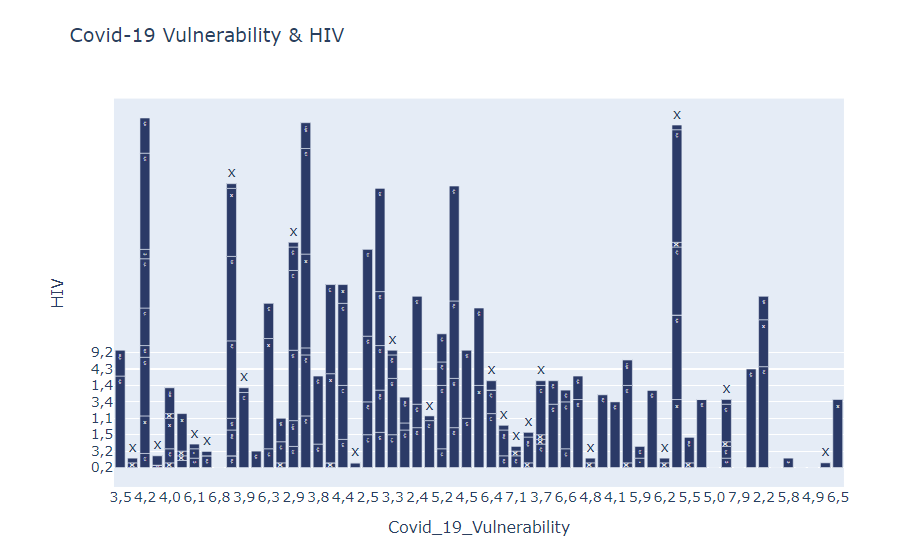

In [ ]:

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(solution)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(solution, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(solution, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(solution, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Addressed Population', fontsize = 40)
plt.show()

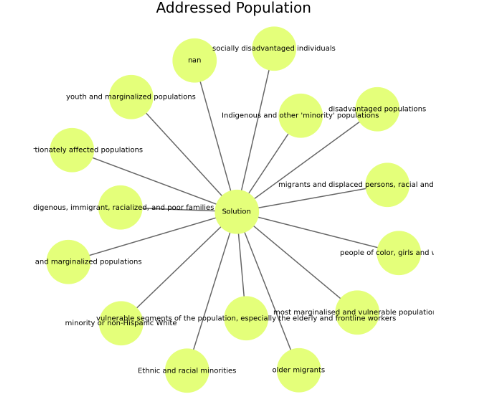

In [ ]:
fig,ax=plt.subplots(figsize=(18,6))
sns.set_style('dark')
plt.subplot(1, 2, 1)
g1=sns.countplot(df3['Fecha_de_entrega'],palette='rocket', hue = df3['Entregado'],**{'hatch':'/','linewidth':3})
g1.set_title("Deliver Month")

plt.subplot(1, 2, 2)
g2=sns.countplot(df3['Disponible '],palette='rocket',hue= df3['Entregado'],**{'hatch':'/','linewidth':3})
g2.set_title("Available Supplies");

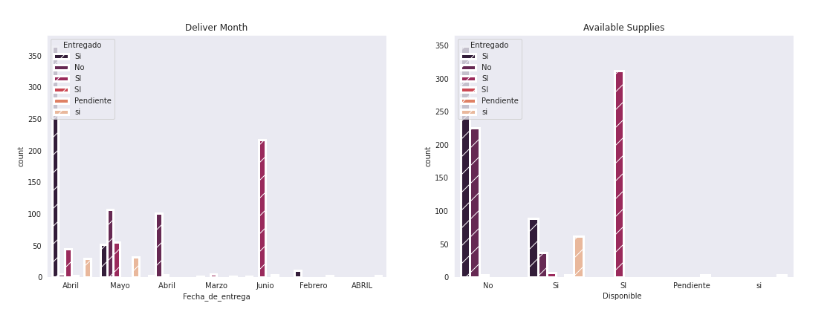

In [ ]:
# !pip install matplotlib_venn

# 2. Seaborn

## Venn Daigram

https://python-graph-gallery.com/171-basic-venn-diagram-with-3-groups

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Use the venn2 function
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (10, 8, 10, 6,9,4,2))
plt.show()

In [ ]:
# Corelation heatmap for numeric features

plt.figure(figsize=(6,6))
sns.heatmap(train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),annot=True)
plt.show()

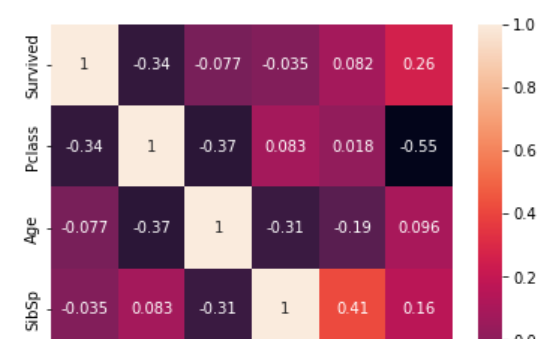

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(y_train)
plt.axvline(y_train.mean(), color="r")
plt.axvline(y_train.median(), color="b")

plt.subplot(1,2,2)
sns.boxplot(y = y_train)

plt.show()

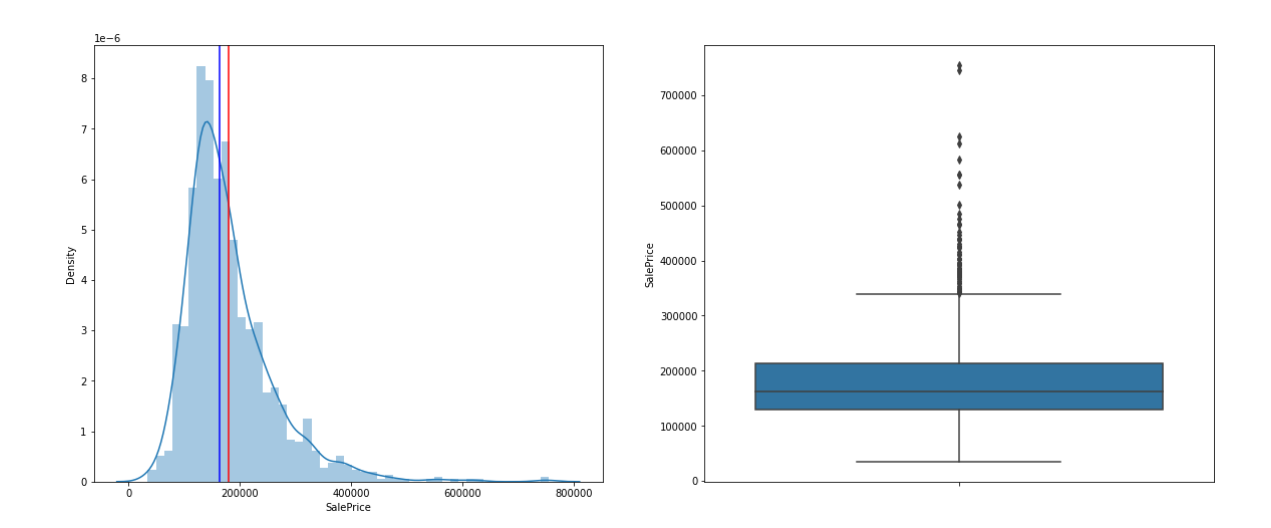

In [ ]:
data = en_bd_restaurant.name.value_counts().to_dict()

wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300).generate_from_frequencies(data)
plt.figure(figsize=(14,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
result = wc.to_file("English_word_cloud.png")
printmd("### These are the Most Frequently Used Restaurant Names in English")

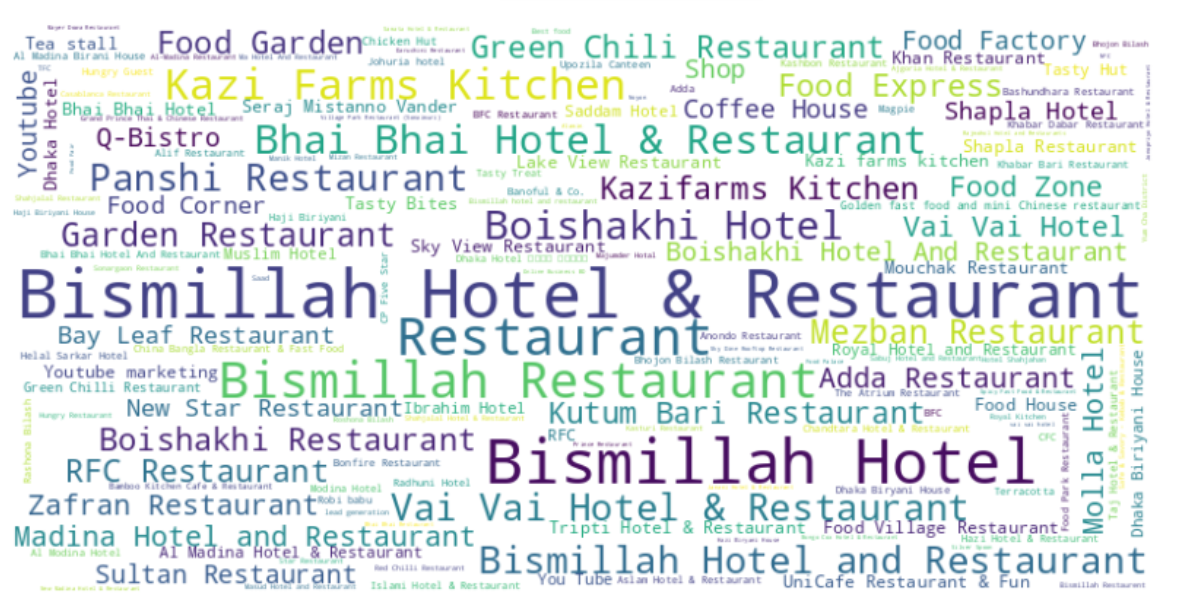

In [ ]:
import geopandas
import folium
from folium.plugins import MarkerCluster, HeatMap

geometry = geopandas.points_from_xy(bd_rest_df.longitude, bd_rest_df.latitude)
geo_df = geopandas.GeoDataFrame(bd_rest_df[['longitude', 'latitude']], geometry=geometry)

geo_df.head()

bd_coordinate = [23.6850, 90.3563]

site_map = folium.Map(location=bd_coordinate, tiles='Cartodb dark_matter', zoom_start=8)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

# heat_data
HeatMap(heat_data).add_to(site_map)

site_map

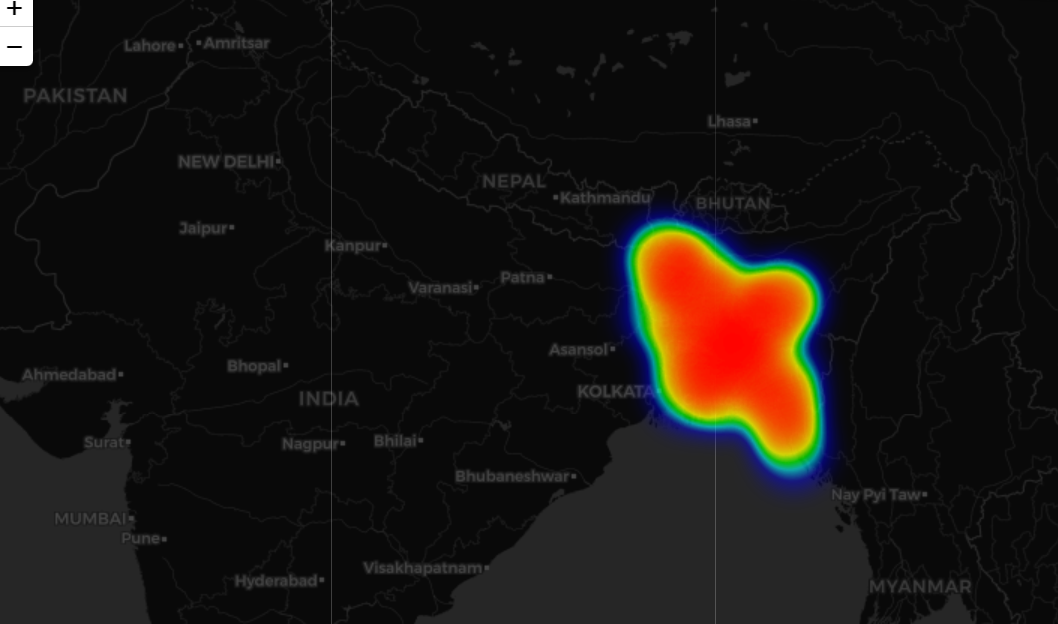

In [ ]:
bd_coordinate = [23.6850, 90.3563]
site_map = folium.Map(location=bd_coordinate, zoom_start=7)

data = bd_rest_df[bd_rest_df['affluence'].notna()==True]

for i in range(0, len(data)):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
        popup=data.iloc[i]['name'],
        tooltip=str(data.iloc[i]['name'])+','+str(data.iloc[i]['affluence'])
    ).add_to(site_map)
site_map

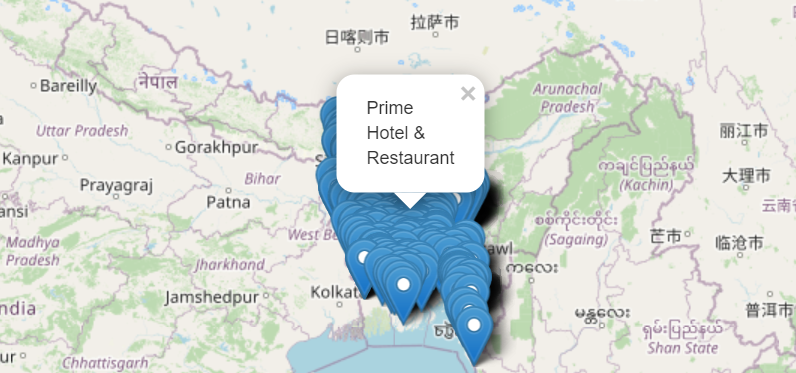

# 3. Matplotlib

In [ ]:
# custom label
plt.pie(df['target'].value_counts().values,labels=['Ham','Spam'])

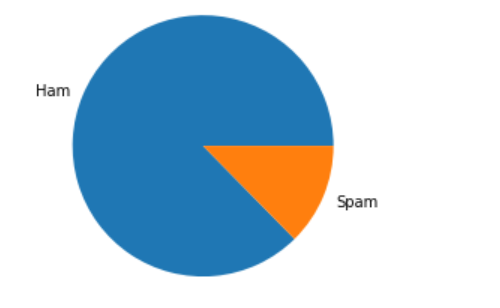

1. Donut

In [ ]:
import matplotlib.pyplot as plt


# Setting size in Chart based on
# given values
sizes = [100, 500, 70, 54, 440]

# Setting labels for items in Chart
labels = ['Apple', 'Banana', 'Mango', 'Grapes', 'Orange']

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Favourite Fruit Survey')

# Add Legends
plt.legend(labels, loc="upper right")

# Displaying Chart
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# create data
size_of_groups=[12,11,3,30]

# Create a pieplot
plt.pie(size_of_groups)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [ ]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
data = [{'id': 'World', 'datum': 6964195249, 'children' : [
              {'id' : "North America", 'datum': 450448697,
                   'children' : [
                     {'id' : "United States", 'datum' : 308865000},
                     {'id' : "Mexico", 'datum' : 107550697},
                     {'id' : "Canada", 'datum' : 34033000} 
                   ]},
              {'id' : "South America", 'datum' : 278095425, 
                   'children' : [
                     {'id' : "Brazil", 'datum' : 192612000},
                     {'id' : "Colombia", 'datum' : 45349000},
                     {'id' : "Argentina", 'datum' : 40134425}
                   ]},
              {'id' : "Europe", 'datum' : 209246682,  
                   'children' : [
                     {'id' : "Germany", 'datum' : 81757600},
                     {'id' : "France", 'datum' : 65447374},
                     {'id' : "United Kingdom", 'datum' : 62041708}
                   ]},
              {'id' : "Africa", 'datum' : 311929000,  
                   'children' : [
                     {'id' : "Nigeria", 'datum' : 154729000},
                     {'id' : "Ethiopia", 'datum' : 79221000},
                     {'id' : "Egypt", 'datum' : 77979000}
                   ]},
              {'id' : "Asia", 'datum' : 2745929500,  
                   'children' : [
                     {'id' : "China", 'datum' : 1336335000},
                     {'id' : "India", 'datum' : 1178225000},
                     {'id' : "Indonesia", 'datum' : 231369500}
                   ]}
    ]}]

In [ ]:
# import the circlify library
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

In [ ]:
# import libraries
# !pip install circlify
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))



In [ ]:
colors = ['#7A5197', '#BB5098', '#5344A9', '#F5C63C', '#F47F6B']

plt.subplots(figsize=(25, 10), facecolor='#f6f5f5')
plt.pie(train_labels['state'].value_counts(), startangle=90, wedgeprops={'width':0.3}, colors=['#F5C63C', '#7A5197'] )
plt.title('Target Balance Pie Chart', loc='center', fontsize=24, color='#7A5197', fontweight='bold');
plt.text(0, 0, f"{train_labels['state'].value_counts()[0] / train_labels['state'].count() * 100:.2f}%", ha='center', va='center', fontweight='bold', fontsize=42, color='#7A5197');
plt.legend(train_labels['state'].value_counts().index, ncol=2, facecolor='#f6f5f5', edgecolor='#f6f5f5', loc='lower center', fontsize=16);
plt.show();

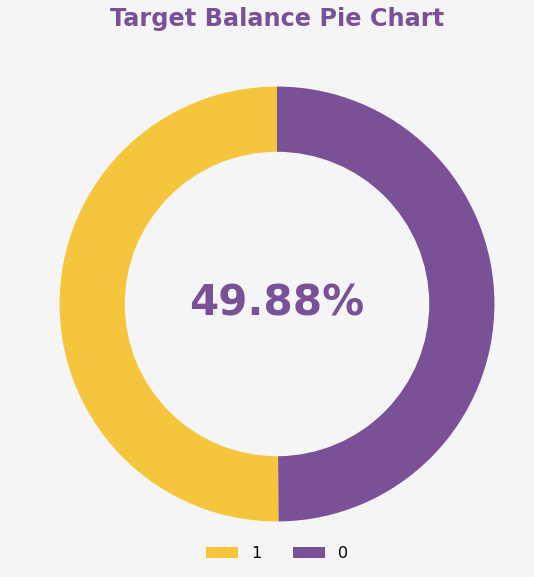

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['old_price'],x=df['brand'],color='red',label='Old Price')
sns.barplot(y=df['latest_price'],x=df['brand'],color='g',label='New Price')
plt.xticks(rotation=90)
plt.title('Old vs New Price Comparision')
plt.legend( ncol=1, facecolor='gray', edgecolor='#f6f5f5', loc='upper left', fontsize=16)
plt.show()

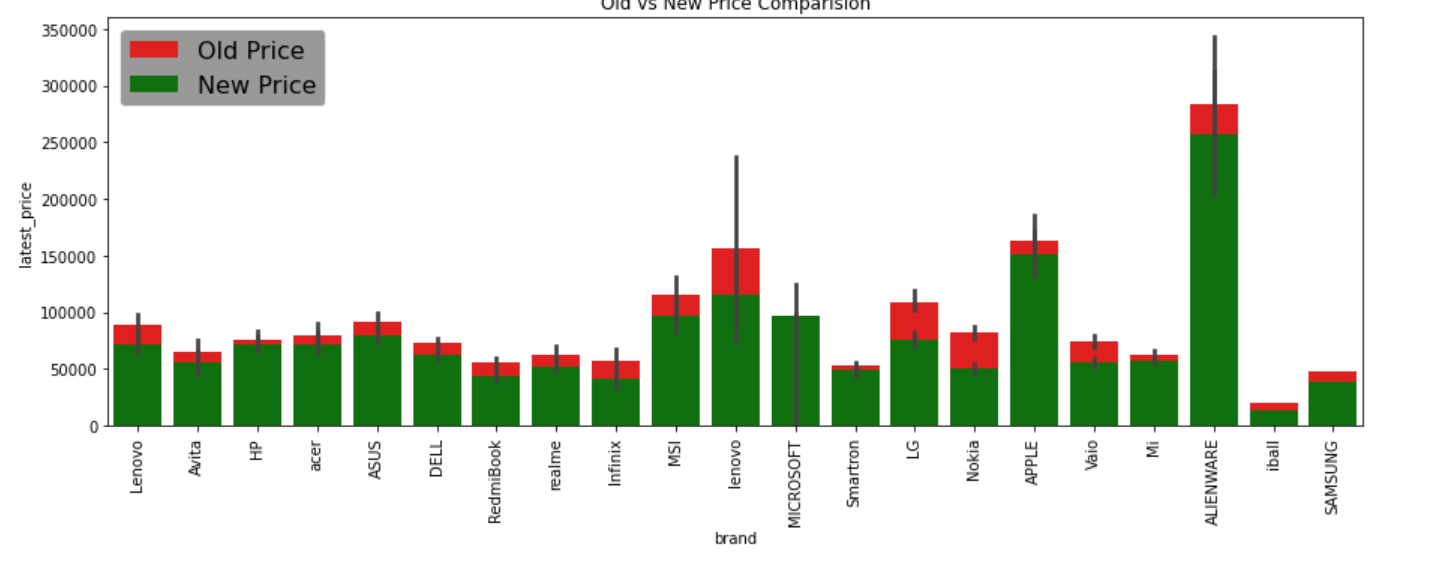